<span>
<b>Authors:</b> 
<a href="http://------">Ornela Danushi </a>
<a href="http://------">Gerlando Gramaglia </a>
<a href="http://------">Domenico Profumo </a><br/>
<b>Python version:</b>  3.x<br/>
</span>

# Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler # normalization
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import InterclusterDistance
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet
from scipy.spatial.distance import pdist

from pyclustering.cluster.xmeans import xmeans
from pyclustering.cluster import cluster_visualizer, cluster_visualizer_multidim
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster.silhouette import silhouette
from pyclustering.cluster.encoder import type_encoding, cluster_encoder

# Prepare dataset

In [2]:
df = pd.read_csv("dataset/tennis_players.csv", skipinitialspace=True, sep=',', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2120 entries, 0 to 3906
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   2120 non-null   object 
 1   num_matches            2120 non-null   int64  
 2   ratio                  2120 non-null   float64
 3   ratio_2016-2019        2120 non-null   float64
 4   num_matches_2020-2021  2120 non-null   float64
 5   ratio_2020-2021        2120 non-null   float64
 6   hand                   2120 non-null   object 
 7   gender                 2120 non-null   object 
 8   ioc                    2120 non-null   object 
 9   birth                  2120 non-null   float64
 10  ht                     2120 non-null   float64
 11  minutes                2120 non-null   float64
 12  perc_ace               2120 non-null   float64
 13  _1stwon_1stIn          2120 non-null   float64
 14  perc_df                2120 non-null   float64
 15  perc

### Drop categorical data

In [3]:
del df['name']
del df['hand']
del df['gender']
del df['ioc']

In [4]:
df.head()

,num_matches,ratio,ratio_2016-2019,num_matches_2020-2021,ratio_2020-2021,birth,ht,minutes,perc_ace,_1stwon_1stIn,perc_df,perc_2ndwon,perc_v_ace,perc_v_df,perc_v_1stwon
0,11,18.181818,20.000000,1.0,0.000000,1996.0,187.076923,86.694444,14.98,68.357488,12.32,47.78,8.82,5.88,75.79
1,157,47.770701,47.887324,15.0,46.666667,1994.0,170.857143,61.621951,1.30,29.801525,4.67,22.10,3.18,5.39,37.90
2,16,50.000000,46.153846,3.0,66.666667,1998.0,183.800000,86.875000,20.59,71.881188,10.89,51.65,7.12,10.10,70.86
4,126,58.730159,57.522124,13.0,69.230769,1992.0,172.137868,63.205561,3.32,57.931157,11.42,54.16,3.76,7.94,47.32
5,14,21.428571,21.428571,0.0,0.000000,1995.0,172.137868,49.409091,0.00,20.185185,16.30,17.20,0.51,2.55,11.88


## Normalization

### MinMax Normalization before clustering

In [5]:
scaler = MinMaxScaler()
df_norm_minmax = scaler.fit_transform(df.values)
#print(df_norm_minmax)

### ZScore Normalization before clustering

In [6]:
scaler = StandardScaler()
df_norm_zscore = scaler.fit_transform(df.values) 
#print(df_norm_zscore)

# Partitional and center-based clustering: K-Means

**Objective:** Clusters the data into $k$ groups.
* **Init step:** Select k points at random as cluster centers.
* **Assignment step:** Assign each instance to the cluster with the closest mean according to the distance function.
* **Update step**: Calculate the new means to be the centroids of the instances in the new clusters.
* ***Repeat*** steps 2 and 3 until the assignment no longer change.

There is no guarantee that the optimum is found using this algorithm.

## Problems

* Initial Centroids
* Number of clusters

### Number of clusters decision: Elbow Method on the clusters Inertia
In cluster analysis, the elbow method is a heuristic used in determining the optimal number of clusters in a data set. 
<br>It consists of plotting the SSE as a function of the number of clusters, and **picking the elbow** of the curve as the *k* to use.

We start from an initial value of 2 and we keep computing the clusterization until we reach the value of 30, our choice for the maximum value of *k*. 
<br>Considering ranges of k differing in size may lead to slightly different elbows, so we also plot the curves of the intervals [2,10] and [2,20].


## Scoring parameter metrics
https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

* **Distortion:** Is the default method, it computes the mean Sum of Squared distances from each point to its assigned center.

* **Average Silhouette:** It is an indicator of both separation and cohesion among clusters. We look for the clusterization with the highest average value among those computed by K-means. It computes the mean ratio of intra-cluster and nearest cluster distance.

* **Calinski Harabasz:** It computes the ratio of dispersion between and within clusters.


The elbow_locate=True means that it automatically finds the 'elbow' or 'knee' which likely corresponds to the optimal value of k using the 'knee point detection algorithm'. This algorithm finds the point of maximum curvature, which in a well-behaved clustering problem also represents the pivot of the elbow curve.

NOTE: the 'elbow' method does not work well if the data is not very clustered, in this case there is a smooth curve and the optimal value of k will be unclear. Then other scoring methods such as BIC or SSE, also can be used to explore if clustering is a correct choice

The blue line is the function output.
The vertical dashed line signs the optimal k value.
The green line signs the time needed for each clustering of different k.
If there is a strong elbow (point of inflection on the curve) there is the optimal k.


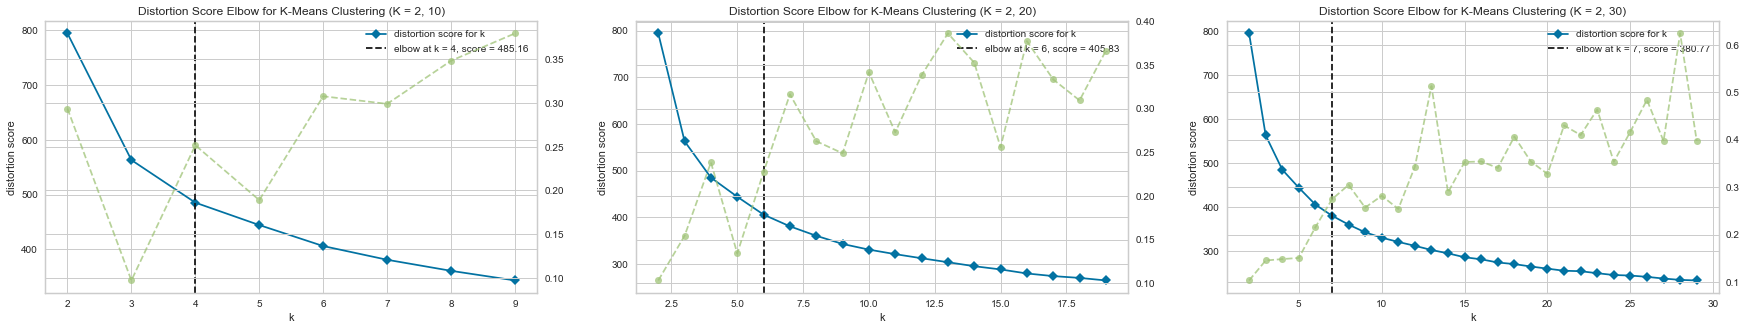

The arm is up going.


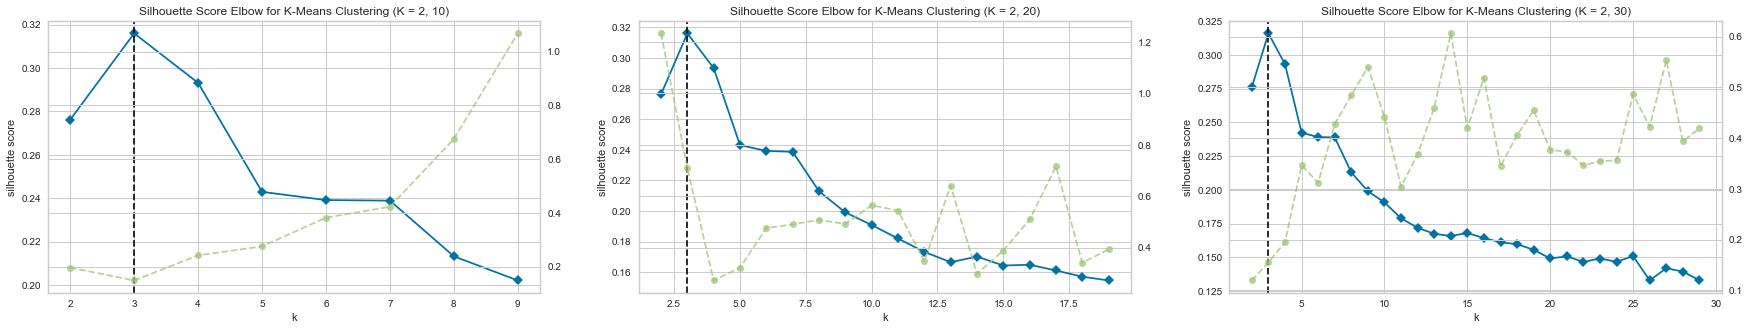

It highlights a global maxima for k equals to 3 and a local maxima for k equals to 4 or 2
We consider these values to the list of candidates for the optimal value of k.


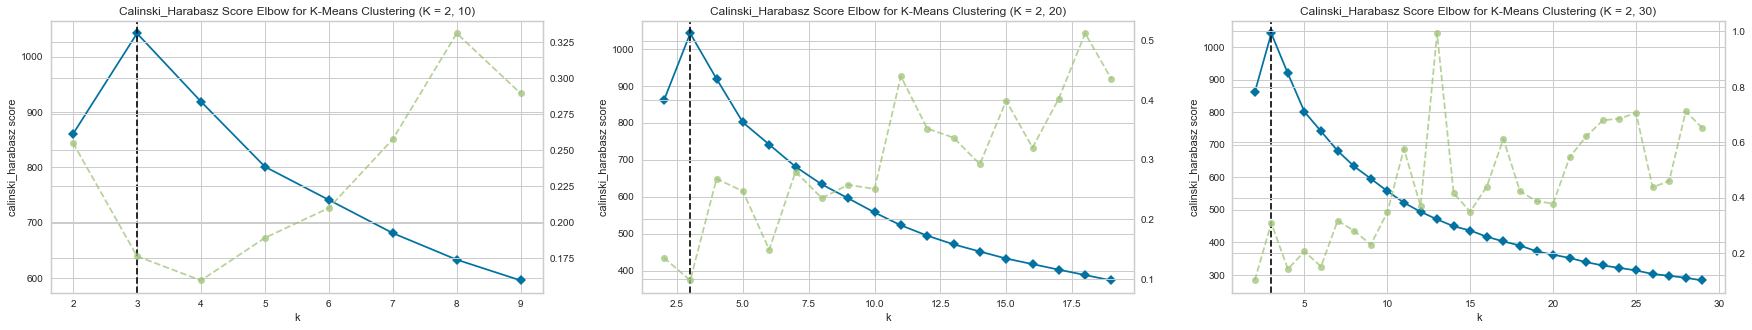

The arm is down going.
The line chart (both for Distortion and Calinski) looks like an arm then the elbow point is the best value of k


In [7]:
# can try both the normalized forms without obtaining differences

df_norm = df_norm_minmax
#df_norm = df_norm_zscore

k_start = [2]
k_max = [10, 20, 30]
Ks = []
model = KMeans()

print("The blue line is the function output.")
print("The vertical dashed line signs the optimal k value.")
print("The green line signs the time needed for each clustering of different k.")
print("If there is a strong elbow (point of inflection on the curve) there is the optimal k.")
f, axs = plt.subplots(nrows=1, ncols=len(k_max), figsize=(30,5)) # print the elbow plots
for i in range(len(k_max)):
    vis = KElbowVisualizer(model, k=(k_start[0],k_max[i]), metric='distortion', timings=True, ax=axs[i])
    vis.fit(df_norm) #fit the data to the visualizer 
    axs[i].set_title('Distortion Score Elbow for K-Means Clustering (K = ' + str(k_start[0]) + ', ' + str(k_max[i]) + ')' )
    axs[i].set_ylabel('distortion score')
    axs[i].set_xlabel('k')
    axs[i].legend(['distortion score for k','elbow at k = ' + str(vis.elbow_value_) + ', score = ' + '{:.2f}'.format(vis.elbow_score_)])
    if (vis.elbow_value_ not in Ks) and (vis.elbow_value_ != None):
        Ks.append(vis.elbow_value_)
plt.show() #finalize and render the figure
plt.close()
print("The arm is up going.")

f, axs = plt.subplots(nrows=1, ncols=len(k_max), figsize=(30,5))
for i in range(len(k_max)):
    vis = KElbowVisualizer(model, k=(k_start[0],k_max[i]), metric='silhouette', timings=True, ax=axs[i])
    #vis = KElbowVisualizer(model, k=(k_start[0],k_max[i]), metric='silhouette', timings=True, ax=axs[i], locate_elbow=False)
    vis.fit(df_norm)  
    axs[i].set_title('Silhouette Score Elbow for K-Means Clustering (K = ' + str(k_start[0]) + ', ' + str(k_max[i]) + ')' )
    axs[i].set_ylabel('silhouette score')
    axs[i].set_xlabel('k')
plt.show()
plt.close()
print("It highlights a global maxima for k equals to 3 and a local maxima for k equals to 4 or 2")
print("We consider these values to the list of candidates for the optimal value of k.")


f, axs = plt.subplots(nrows=1, ncols=len(k_max), figsize=(30,5))
for i in range(len(k_max)):
    vis = KElbowVisualizer(model, k=(k_start[0],k_max[i]), metric='calinski_harabasz', timings=True, ax=axs[i])
    #vis = KElbowVisualizer(model, k=(k_start[0],k_max[i]), metric='calinski_harabasz', timings=True, ax=axs[i], locate_elbow=False)
    vis.fit(df_norm)  
    axs[i].set_title('Calinski_Harabasz Score Elbow for K-Means Clustering (K = ' + str(k_start[0]) + ', ' + str(k_max[i]) + ')' )
    axs[i].set_ylabel('calinski_harabasz score')
    axs[i].set_xlabel('k')
plt.show()
plt.close()
print("The arm is down going.")

print("The line chart (both for Distortion and Calinski) looks like an arm then the elbow point is the best value of k")

### Number of clusters decision: Intercluster Distance Maps
It displays an embedding of the cluster centers in 2D with the distance to other centers preserved.
i.e. the closer to centers are in the visualization, the closer they are in the original feature space
Each cluster is sized according to a scoring metric. By default, they are sized by membership, i.e. the number of instances that belong to each center. This gives a sense of the relative importance of clusters.

NOTE: because 2 clusters overlap in the 2D space, it does not imply that they overlap in the original feature space

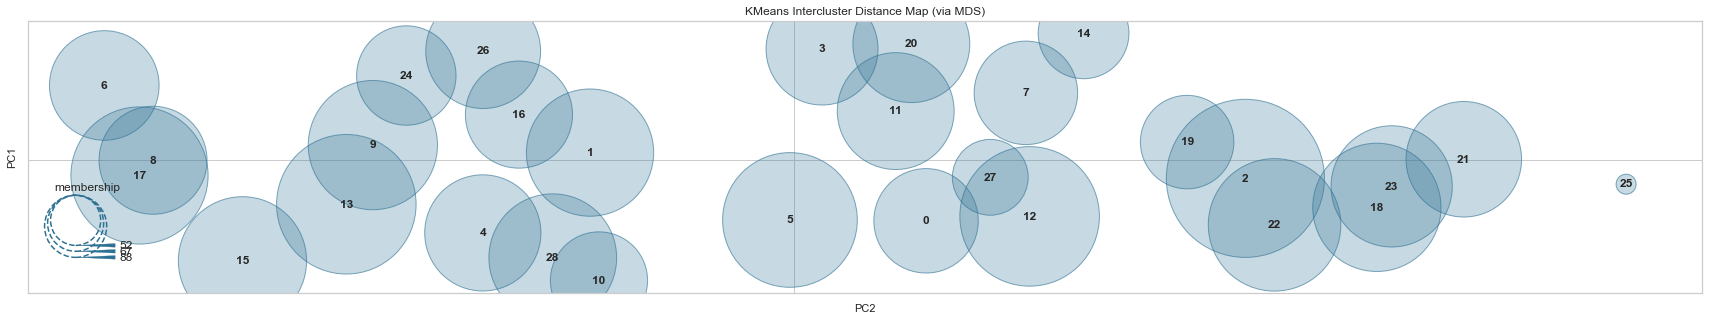

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [8]:
f, axs = plt.subplots(nrows=1, ncols=1, figsize=(30,5))
vis = InterclusterDistance(model)
vis.fit(df_norm)  
vis.show()


## Visualization of the clusters in 2 dimensions

Parameters:
* **n_clusters**: The number of clusters
* **n_init**: Number of time k-means will be run with different initial centroids. The final results will be the best output in terms of inertia.
* **max_iter**: Maximum number of iterations of the k-means algorithm for a single run.

Output:
* **labels_**: Labels of each point
* **cluster\_centers_**: Coordinates of cluster centers
* **inertia_**: Sum of squared distances of samples to their closest cluster center.

KMeans()
silhouette_score: 0.2119851814163481
{0: 378, 1: 335, 2: 196, 3: 181, 4: 187, 5: 354, 6: 229, 7: 260}


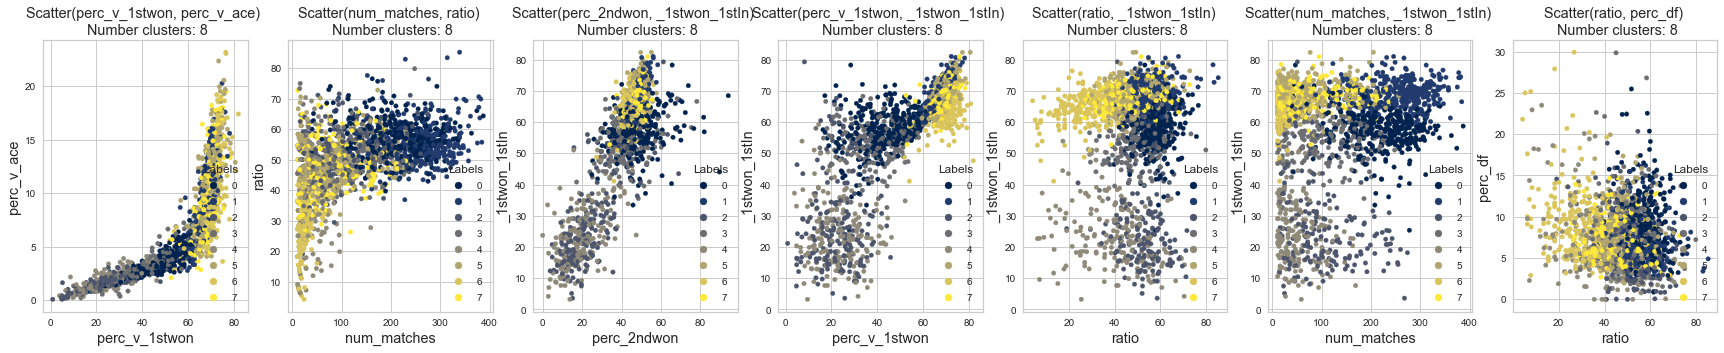

KMeans(max_iter=100, n_clusters=2)
silhouette_score: 0.2762132870027357
{0: 1218, 1: 902}


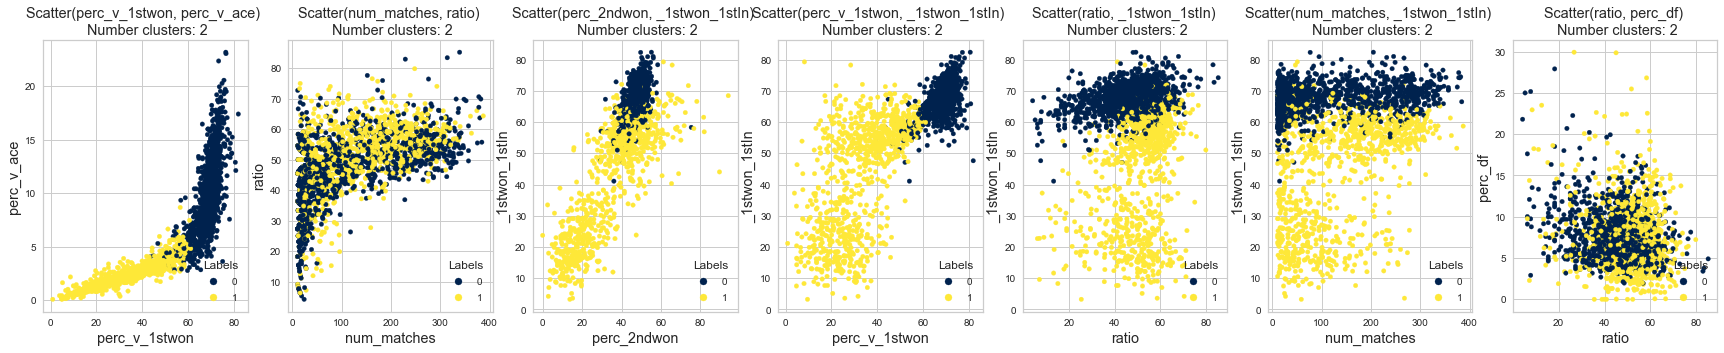

KMeans(max_iter=100, n_clusters=3)
silhouette_score: 0.31601518850180704
{0: 579, 1: 819, 2: 722}


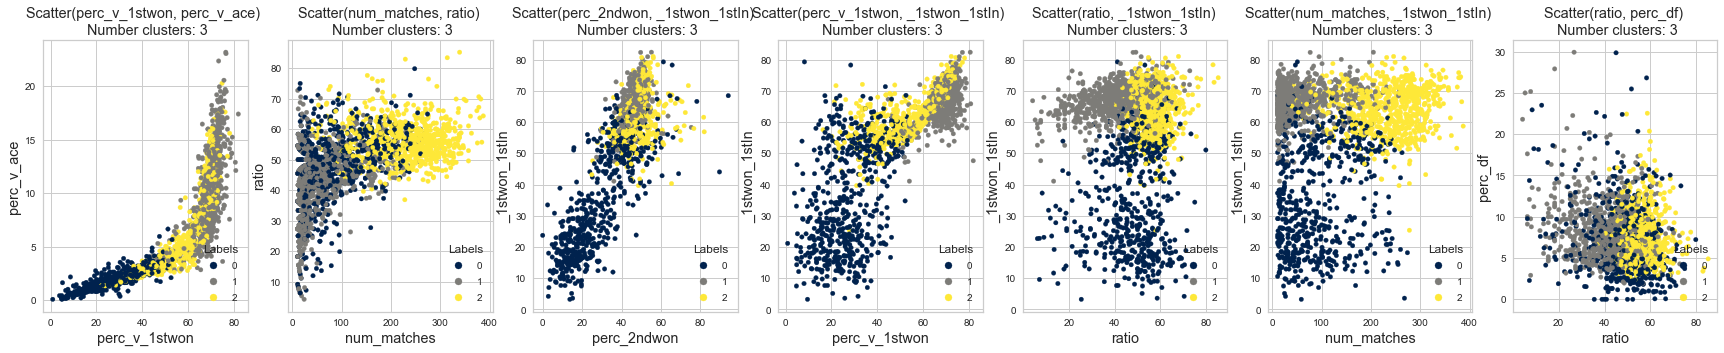

KMeans(max_iter=100, n_clusters=4)
silhouette_score: 0.29330915886991216
{0: 806, 1: 451, 2: 437, 3: 426}


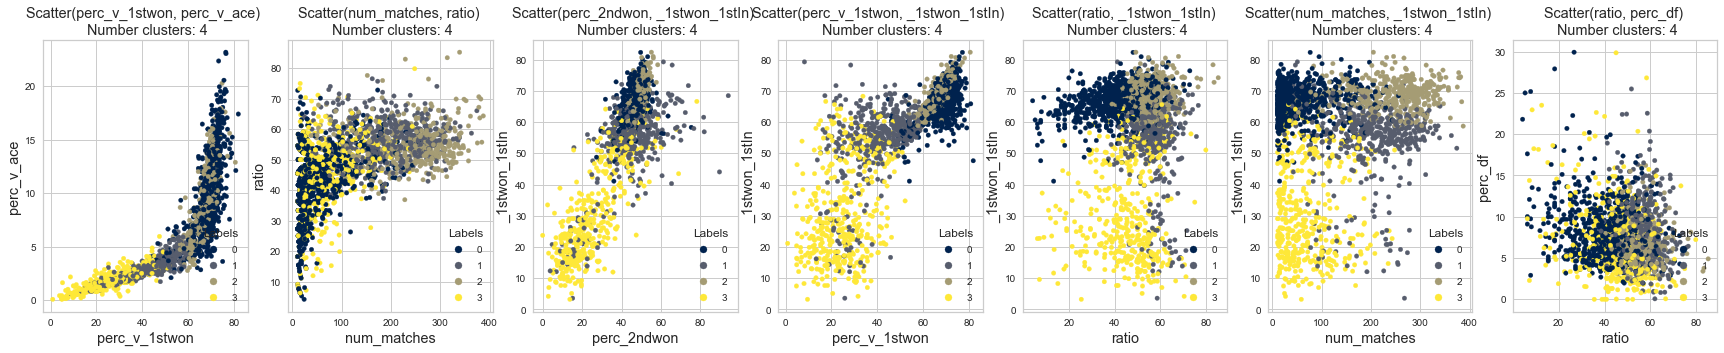

In [9]:
for i in range(1,5):
    if i==1:
        kmeans = KMeans(n_clusters=8, n_init=10, max_iter=300) #default parameters
    else:
        kmeans = KMeans(n_clusters=i, n_init=10, max_iter=100) #global max k=3, local max k=4,2 from the Silhouette score analyisis

    print(kmeans.fit(df_norm)) 
    s = silhouette_score(df_norm, kmeans.labels_)
    print("silhouette_score:", s);
    hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
    print( dict(zip(bins, hist)) )
        
    f, axs = plt.subplots(ncols=7, figsize=(30,5))
    for j in range(0,7):
        if j==0:
            df1,df2 = df['perc_v_1stwon'],df['perc_v_ace']
        elif j==1:
            #df1,df2 = df['perc_ace'],df['perc_v_ace']
            df1,df2 = df['num_matches'],df['ratio']
        elif j==2:
            #df1,df2 = df['minutes'],df['perc_df']
             df1,df2 = df['perc_2ndwon'],df['_1stwon_1stIn']
        elif j==3:
            #df1,df2 = df['minutes'],df['perc_ace']
             df1,df2 = df['perc_v_1stwon'],df['_1stwon_1stIn']
        elif j==4:
            df1,df2 = df['ratio'],df['_1stwon_1stIn']
        elif j==5:
            df1,df2 = df['num_matches'],df['_1stwon_1stIn']
        elif j==6:
            df1,df2 = df['ratio'],df['perc_df']
        
        scat=axs[j].scatter(df1, df2, s=20, c=kmeans.labels_, cmap='cividis') 
        axs[j].set_title('Scatter('+df1.name+', '+df2.name+') \n Number clusters: '+ str(len(set(kmeans.labels_))) , fontdict={'fontsize': 'large'})
        axs[j].set_xlabel(df1.name, fontdict={'fontsize': 'large'})
        axs[j].set_ylabel(df2.name, fontdict={'fontsize': 'large'})
        axs[j].legend(*scat.legend_elements(), loc="lower right", title="Labels")
        
    plt.show()
    plt.close()

# DBSCAN
Parameters:
* **eps**: The maximum distance between two samples for them to be considered as in the same neighborhood.
* **min_samples**: The number of samples in a neighborhood for a point to be considered as a core point. This includes the point itself.


To try different configurations of parameters, we set 3 vectors:
* **eps_values**: Vector of eps
* **min_samples_values**: Vector of min_samples
* **metrics**: Vector of metrics



In total, we try 1008 different configuration, however, how the reader can see below, we can't exploit a good clustering of our data using dbscan. 

In [10]:
scaled=df_norm_minmax
num_features=df

In [11]:
eps_values = [0.005, 0.01, 0.05, 0.08, 0.1, 0.15, 0.20, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55]
min_samples_values = [3, 5, 6, 7, 8, 9, 10, 15, 16, 17, 18, 20]
metrics = ['euclidean'] #'cityblock', 'cosine', 'l1', 'l2', 'manhattan']
dbscan = []
dbscan_pair = []
k = 0
for metric in metrics:
    for i in range(len(eps_values)):
        for j in range(len(min_samples_values)):
            d = DBSCAN(eps=eps_values[i], min_samples=min_samples_values[j]) # algorithmic parameters
            dbscan.append(d.fit(scaled))
            if (len(np.unique((dbscan[k].labels_))) > 1):
                s = silhouette_score(scaled, dbscan[k].labels_)
                pair = (dbscan[k], s)
                dbscan_pair.append(pair)
            k = 1 + k


## DBScan Validation

To evaluete our cluster, sort by second component of dbscan_pair (that contain the pairs <dbscan, silhouette>) and take the last ten elements, these are the clusters with the greater silhouette. Then, visualize the coefficient, the number of clusters and their cardinality. From the results below, can be notice that best dbscans are composed by an eps = 0.55 and different values of min_sample, however silhouette values are small, the max value found are around 0.28. Also, best dbscans obtain only one big cluster and a very small cluster formed by outliers. So, from these results, it's possible to deduce that DBSCAN is not very well to clustering our data. 

In [12]:
db_best_k = sorted(dbscan_pair, key=lambda x: x[1])
db_best_k = db_best_k[-10:]

In [13]:
for i in range(len(db_best_k)):
    print(db_best_k[i][0], np.unique(db_best_k[i][0].labels_, return_counts=True))
    print('Silhouette ', db_best_k[i][1])

DBSCAN(eps=0.45, min_samples=8) (array([-1,  0]), array([  30, 2090]))
Silhouette  0.22153442629044542
DBSCAN(eps=0.45, min_samples=9) (array([-1,  0]), array([  30, 2090]))
Silhouette  0.22153442629044542
DBSCAN(min_samples=3) (array([-1,  0]), array([   7, 2113]))
Silhouette  0.22727099338147558
DBSCAN(eps=0.55) (array([-1,  0]), array([   3, 2117]))
Silhouette  0.26160406451794005
DBSCAN(eps=0.55, min_samples=6) (array([-1,  0]), array([   3, 2117]))
Silhouette  0.26160406451794005
DBSCAN(eps=0.55, min_samples=7) (array([-1,  0]), array([   3, 2117]))
Silhouette  0.26160406451794005
DBSCAN(eps=0.55, min_samples=8) (array([-1,  0]), array([   3, 2117]))
Silhouette  0.26160406451794005
DBSCAN(eps=0.55, min_samples=9) (array([-1,  0]), array([   3, 2117]))
Silhouette  0.26160406451794005
DBSCAN(eps=0.55, min_samples=10) (array([-1,  0]), array([   3, 2117]))
Silhouette  0.26160406451794005
DBSCAN(eps=0.55, min_samples=3) (array([-1,  0]), array([   2, 2118]))
Silhouette  0.285401254638

To completness, it's showed also the best results in case dbscan identify more then two clusters (at least one cluster apart custer -1 and 0). Obviously the silhouette it's worste then before and also in this case we have a very big cluster and other smallest one.

In [14]:
db_two = []
for i in range(len(dbscan_pair)):
    if len(np.unique(dbscan_pair[i][0].labels_)) > 2:
        db_two.append(dbscan_pair[i])

In [15]:
db_two = sorted(db_two, key=lambda x: x[1])
db_two = db_two[-5:]

In [16]:
for i in range(len(db_two)):
    print(np.unique(db_two[i][0].labels_, return_counts=True), 'sil', db_two[i][1])

(array([-1,  0,  1,  2]), array([ 645, 1322,  116,   37])) sil 0.07184024475036536
(array([-1,  0,  1,  2]), array([ 613, 1333,  120,   54])) sil 0.07723159133863725
(array([-1,  0,  1,  2]), array([ 585, 1348,  122,   65])) sil 0.08072957004503963
(array([-1,  0,  1]), array([  17, 2100,    3])) sil 0.10058159949283621
(array([-1,  0,  1]), array([  61, 2054,    5])) sil 0.1346547835067245


### Visualization
Below is showed scatter plot of the best dbscan formed by eps = 0.55 and min_sample = 2. 

In [17]:
def scatter_subplots(cell, x, y, x_label, y_label, db):
    scat=cell.scatter(x, y, c=db.labels_, s=20, cmap='cividis')
    cell.set_title('Scatter('+x_label+', '+y_label+') \n Number clusters: '+ str(len(set(db.labels_))) , fontdict={'fontsize': 'large'})
    cell.set_xlabel(x_label, fontdict={'fontsize': 'large'})
    cell.set_ylabel(y_label, fontdict={'fontsize': 'large'})
    cell.legend(*scat.legend_elements(), loc="lower right", title="Labels")


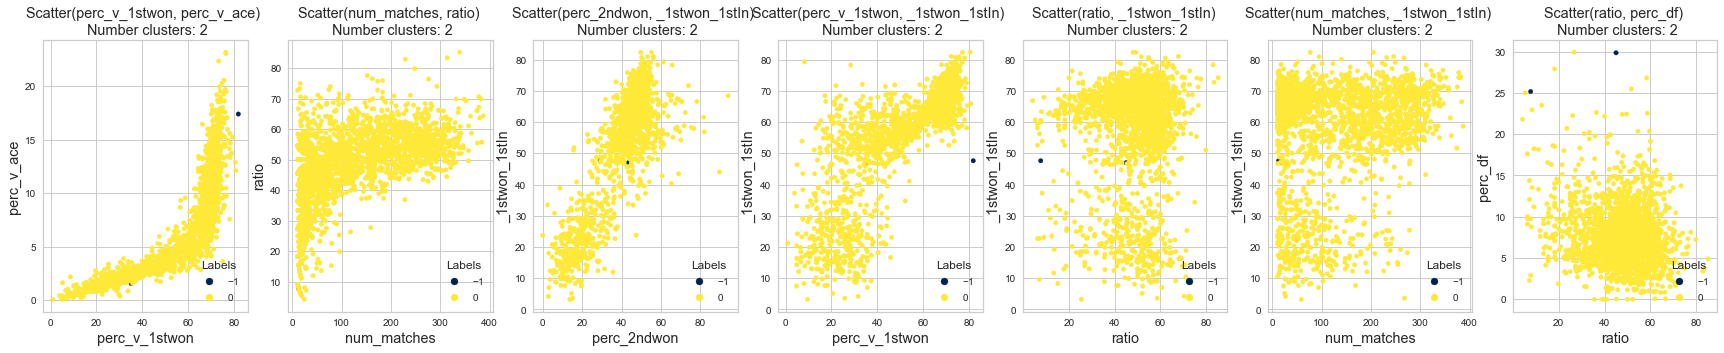

In [18]:
f, axs = plt.subplots(nrows = 1, ncols = 7, figsize=(30,5))
best_db = db_best_k[-1][0]
scatter_subplots(axs[0], num_features.perc_v_1stwon, num_features.perc_v_ace, 'perc_v_1stwon', 'perc_v_ace', best_db)
scatter_subplots(axs[1], num_features.num_matches, num_features.ratio, 'num_matches', 'ratio', best_db)
scatter_subplots(axs[2], num_features.perc_2ndwon, num_features._1stwon_1stIn, 'perc_2ndwon', '_1stwon_1stIn', best_db)
scatter_subplots(axs[3], num_features.perc_v_1stwon, num_features['_1stwon_1stIn'], 'perc_v_1stwon', '_1stwon_1stIn', best_db)

scatter_subplots(axs[4], num_features.ratio, num_features['_1stwon_1stIn'], 'ratio', '_1stwon_1stIn', best_db)
scatter_subplots(axs[5], num_features.num_matches, num_features['_1stwon_1stIn'], 'num_matches', '_1stwon_1stIn', best_db)

scatter_subplots(axs[6], num_features.ratio, num_features['perc_df'], 'ratio', 'perc_df', best_db)

# Hierarchical clustering 

There are 2 kinds of hierarchical clustering: 

- Agglomerative: Start with the points as individual clusters, at each step, merge the closest pair of clusters until only one cluster (or k clusters) left

- Divisive: Start with one, all inclusive cluster, at each step, split a cluster until each cluster contains an individual point (or there are k clusters)

Using the scipy library, let's explore the linking function and then plot the dendrogram. In our case the analysis was made taking into consideration the Agglomerative cluster, where in particular we will have four types of methods:

- Single (Min): Proximity of two clusters is based on the two closest points in the different clusters (Determined by one pair of points, i.e., by one link in the proximity graph)
- Complete: Proximity of two clusters is based on the two most distant points in the different clusters (Determined by all pairs of points in the two clusters)
- Average: Proximity of two clusters is the average of pairwise proximity between points in the two clusters (Need to use average connectivity for scalability since total proximity favors large clusters)
- Ward: Similarity of two clusters is based on the increase in squared error when two clusters are merged (Similar to group average if distance between points is distance squared)


Initially, we set type of parameters to be used, in particular the chosen dataset can be taken from the normalization of the minmax or the z-score

In [19]:
#set data for MinMax
data=df_norm_minmax
steps = [0.001, 0.01, 0.01, 0.1]

#set data for Z-Score
#data=df_norm_zscore
#steps = [0.01, 0.1, 0.1, 3]

methods = ['single', 'complete', 'average', 'ward']

In [20]:
#compute the linkage matrix and plot dendrogram for relative model type
def plot_dendrogram(model, **kwargs):

    n_sample = np.zeros(model.children_.shape[0])
    samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < samples:
                current_count += 1 
            else:
                current_count += n_sample[child_idx - samples]
        n_sample[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, n_sample]).astype(float)

    dendrogram(linkage_matrix, **kwargs)


def plot_graph(axs,i,c_thresholds):
    axs[i].set_title('Hierarchical Clustering from ' + methods[i] + ' \n Color Threshold: ' + '{:2.4f}'.format(c_thresholds))
    axs[i].set_xlabel('PlayerID or (Cluster Size)')
    axs[i].set_ylabel('Distance')
    axs[i].axhline(c_thresholds, ls='--', color='r')
    return axs

For each method we go to calculate the agglomerative cluster and then print on the screen the various dendrograms associated with the respective default treshold (initialy set 4/5 of the size of each linkage matrix)

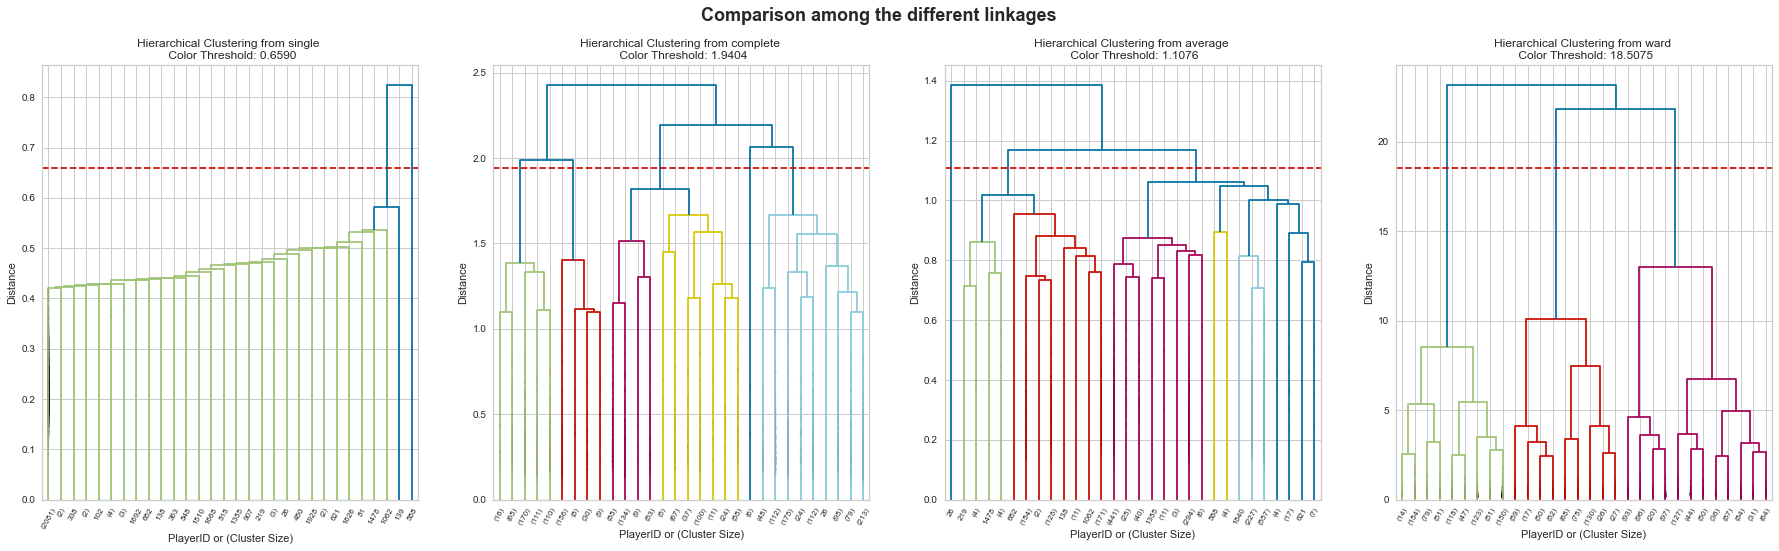

In [21]:
color_thresholds = []

f, axs = plt.subplots(ncols=4, figsize=(31,8))

for i in range(len(methods)):
    model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', linkage=methods[i]).fit(data) 
    plot_dendrogram(model, truncate_mode='lastp', p=30, leaf_rotation=60, leaf_font_size = 8, show_contracted=True, ax=axs[i])
    link_matrix = linkage(data, methods[i])
    #take the threshold of 4/5
    c_threshold=0.8*max(link_matrix[:,2]) 
    axs=plot_graph(axs,i,c_threshold)

plt.suptitle(('Comparison among the different linkages'), fontsize=18, fontweight='bold')
plt.show()

### Find best clusters

To find the best cluster (able to guarantee a correct separation) we used a function that fixed certain steps chosen by us based on the distance between the various clusters of each method previously seen, selects the number of clusters that best separates the data (with maximum distance). Although this choice can be made graphically, we have decided to automate it also for future uses of the dataset

In [22]:
def get_best_cut(linkage, step, norm_data):
    clusters_number = []
    distances = []
    n_clusters = 0
    i = 0

    while n_clusters != 1:
        threshold = i*step
        model = AgglomerativeClustering(distance_threshold=threshold, n_clusters=None, affinity='euclidean', linkage=linkage).fit(norm_data)
        i = i + 1

        n_clusters = model.n_clusters_
        distances.append(threshold)
        clusters_number.append(n_clusters)

    df = pd.DataFrame()
    df['distance'] = distances
    df['n_clusters'] = clusters_number
    
    n_for_opt_cut = df.groupby('n_clusters').size().agg(['idxmax'])[0]
    distance = df[df.n_clusters == n_for_opt_cut].distance.min()
    
    print('Analysis for ' + linkage + ' reached n_clusters = 1 in ' + str(i) + ' steps')
   
    return n_for_opt_cut, distance

We'll search for the best cut for each methods.

In [23]:
best_clusters = []
heights = []

for i in range(len(methods)):
    n_for_opt_cut, height = get_best_cut(methods[i], steps[i], data)
    best_clusters.append(n_for_opt_cut)
    heights.append(height)
    
hierarchical_distances = pd.DataFrame()
hierarchical_distances['method'] = methods
hierarchical_distances['clusters_best_cut'] = best_clusters
hierarchical_distances['distance'] = heights
hierarchical_distances.set_index(['method'], inplace=True)

print(hierarchical_distances)

# We compute and store the labels associated with each cut.
clusters_labels = pd.DataFrame()

for i in range(len(methods)):
    opt_n_clusters = int(hierarchical_distances.loc[methods[i]].clusters_best_cut)
    temp = AgglomerativeClustering(n_clusters=opt_n_clusters, affinity='euclidean', linkage=methods[i])
    labels=temp.fit_predict(data)
    clusters_labels[methods[i]] = labels

clusters_labels[['single', 'complete', 'average', 'ward']]

Analysis for single reached n_clusters = 1 in 825 steps
Analysis for complete reached n_clusters = 1 in 244 steps
Analysis for average reached n_clusters = 1 in 140 steps
Analysis for ward reached n_clusters = 1 in 233 steps
          clusters_best_cut  distance
method                               
single                    2     0.582
complete                  2     2.200
average                   2     1.180
ward                      3    13.000


,single,complete,average,ward
0,0,0,0,1
1,0,0,0,2
2,0,0,0,1
3,0,0,0,0
4,0,0,0,2
...,...,...,...,...
2115,0,0,0,0
2116,0,0,0,2
2117,0,0,0,0
2118,0,0,0,1


## Visualization

We compare the four clusterings by visualizing the distribution of the points among their clusters.

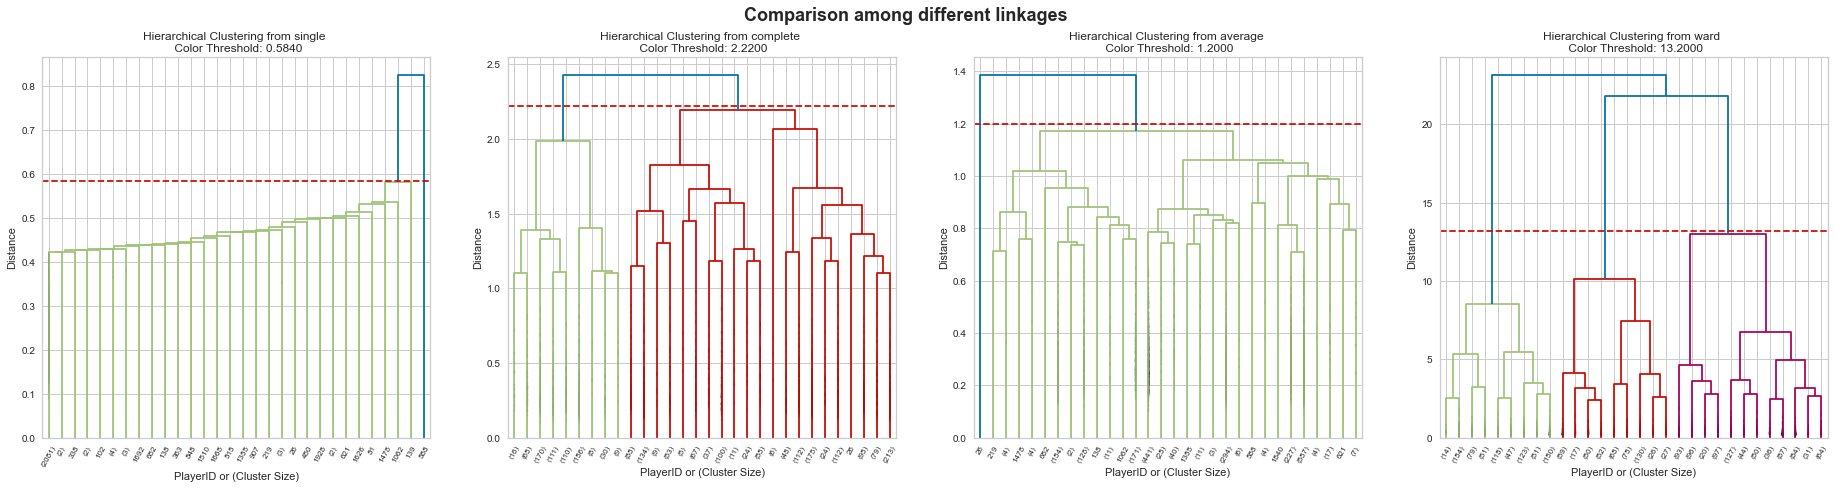

In [24]:
# plot dendrograms

f, axs = plt.subplots(ncols=4, figsize=(32,7))

for i in range(len(methods)):
    color_threshold = hierarchical_distances.loc[methods[i]].distance
    model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', linkage=methods[i]).fit(data) 
    plot_dendrogram(model, truncate_mode='lastp', p=30, leaf_rotation=60, leaf_font_size = 8, show_contracted=True, ax=axs[i], color_threshold=color_threshold)
  
    axs=plot_graph(axs,i,color_threshold + steps[i]*2)

plt.suptitle(('Comparison among different linkages'),
             fontsize=18, fontweight='bold')
plt.show()

### Graph for Ward

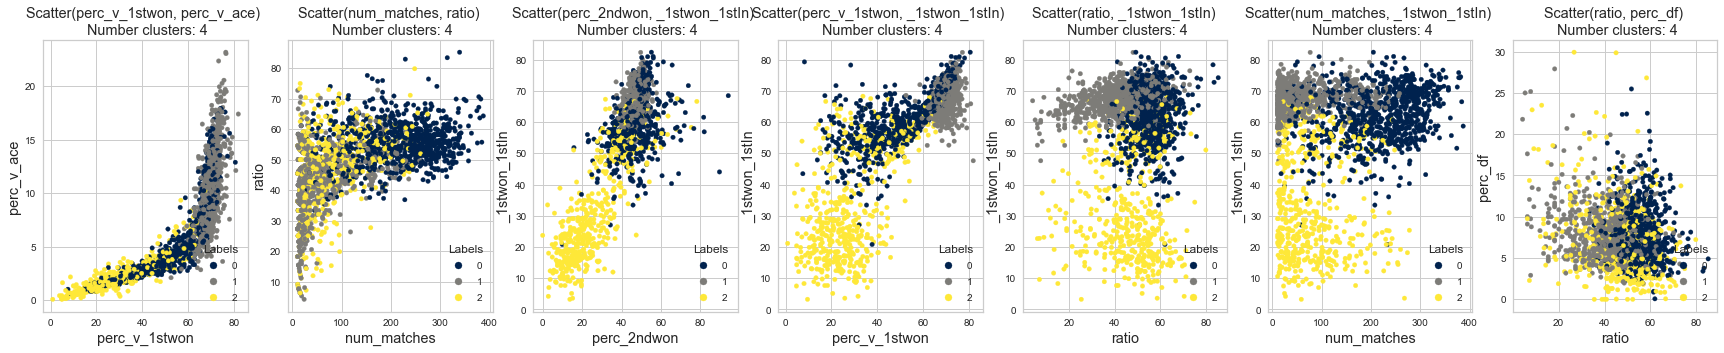

In [25]:
f, axs = plt.subplots(ncols=7, figsize=(30,5))    
for j in range(0,7):
    if j==0:
        df1,df2 = df['perc_v_1stwon'],df['perc_v_ace']
    elif j==1:
        #df1,df2 = df['perc_ace'],df['perc_v_ace']
        df1,df2 = df['num_matches'],df['ratio']
    elif j==2:
        #df1,df2 = df['minutes'],df['perc_df']
         df1,df2 = df['perc_2ndwon'],df['_1stwon_1stIn']
    elif j==3:
        #df1,df2 = df['minutes'],df['perc_ace']
         df1,df2 = df['perc_v_1stwon'],df['_1stwon_1stIn']
    elif j==4:
        df1,df2 = df['ratio'],df['_1stwon_1stIn']
    elif j==5:
        df1,df2 = df['num_matches'],df['_1stwon_1stIn']
    elif j==6:
        df1,df2 = df['ratio'],df['perc_df']

    scat=axs[j].scatter(df1, df2, s=20, c= clusters_labels[methods[3]], cmap='cividis') # i colori vengono presi qua
    axs[j].set_title('Scatter('+df1.name+', '+df2.name+') \n Number clusters: '+ str(len(set(kmeans.labels_))) , fontdict={'fontsize': 'large'})
    axs[j].set_xlabel(df1.name, fontdict={'fontsize': 'large'})
    axs[j].set_ylabel(df2.name, fontdict={'fontsize': 'large'})
    axs[j].legend(*scat.legend_elements(), loc="lower right", title="Labels")

plt.show()
plt.close()

### Graph for single

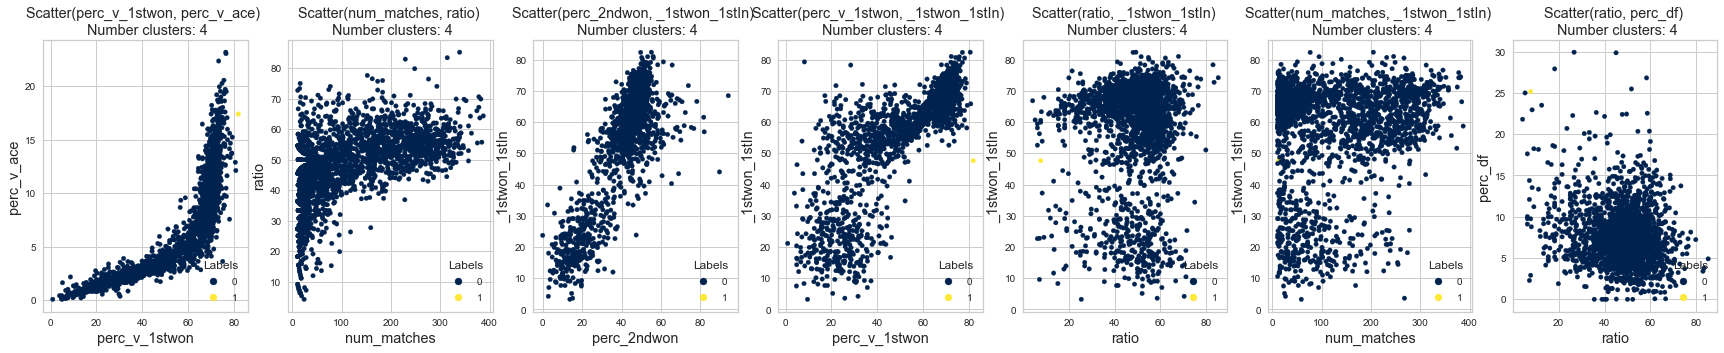

In [26]:
f, axs = plt.subplots(ncols=7, figsize=(30,5))    
for j in range(0,7):
    if j==0:
        df1,df2 = df['perc_v_1stwon'],df['perc_v_ace']
    elif j==1:
        #df1,df2 = df['perc_ace'],df['perc_v_ace']
        df1,df2 = df['num_matches'],df['ratio']
    elif j==2:
        #df1,df2 = df['minutes'],df['perc_df']
         df1,df2 = df['perc_2ndwon'],df['_1stwon_1stIn']
    elif j==3:
        #df1,df2 = df['minutes'],df['perc_ace']
         df1,df2 = df['perc_v_1stwon'],df['_1stwon_1stIn']
    elif j==4:
        df1,df2 = df['ratio'],df['_1stwon_1stIn']
    elif j==5:
        df1,df2 = df['num_matches'],df['_1stwon_1stIn']
    elif j==6:
        df1,df2 = df['ratio'],df['perc_df']

    scat=axs[j].scatter(df1, df2, s=20, c= clusters_labels[methods[0]], cmap='cividis') # i colori vengono presi qua
    axs[j].set_title('Scatter('+df1.name+', '+df2.name+') \n Number clusters: '+ str(len(set(kmeans.labels_))) , fontdict={'fontsize': 'large'})
    axs[j].set_xlabel(df1.name, fontdict={'fontsize': 'large'})
    axs[j].set_ylabel(df2.name, fontdict={'fontsize': 'large'})
    axs[j].legend(*scat.legend_elements(), loc="lower right", title="Labels")

plt.show()
plt.close()

## Evaluation

We used two types of measures for cluster assessment.
- Internal evaluation:
    - Separation: The sum of the weights between nodes in the cluster and nodes outside the cluster.
    - Silhouette: Combines ideas of both cohesion and separation, but for individual points, as well as clusters and clusterings 
    
- External evaluation:
    - Cophenetic correlation: Measure of how faithfully a dendrogram preserves the pairwise distances between the original unmodeled data points


In [27]:
metrics=pd.DataFrame() 
    
sep=[]
sil=[]

cophenetic_coefficients = []

for method in methods:
    sep.append(davies_bouldin_score(data, clusters_labels[method]))
    sil.append(silhouette_score(data, clusters_labels[method]))
    Z = linkage(data, method)
    cophenetic_coefficients = np.append(cophenetic_coefficients, np.corrcoef(pdist(data), cophenet(Z))[0][1])
    
#internal metric
metrics['Methods'] = methods
metrics['Separation'] = sep
metrics['Silhouette'] = sil

#esternal metric
metrics['cophenetic_corr'] = cophenetic_coefficients

#set index to methods
metrics.set_index(['Methods'], inplace=True)
metrics



,Separation,Silhouette,cophenetic_corr
Methods,,,
single,0.499273,0.362651,0.301346
complete,1.661606,0.200896,0.587863
average,0.574748,0.265659,0.694167
ward,1.257283,0.285021,0.633060


# X-MEANS (extra)

In [28]:
mat = np.asmatrix(data).tolist()

In [29]:
scaled = np.array(scaled)

In [30]:
amount_initial_centers = 2
initial_centers = kmeans_plusplus_initializer(mat, amount_initial_centers).initialize()
# Create instance of X-Means algorithm. The algorithm will start analysis from 2 clusters, the maximum
# number of clusters that can be allocated is 20.
xmeans_instance = xmeans(mat, initial_centers, 20, ccore=False, tolerance = 0.08)
xmeans_instance.process()


# Extract clustering results: clusters and their centers
clusters = xmeans_instance.get_clusters()
centers = xmeans_instance.get_centers()
# Visualize clustering results

# by default k-means returns representation CLUSTER_INDEX_LIST_SEPARATION
type_repr = xmeans_instance.get_cluster_encoding();
encoder = cluster_encoder(type_repr, clusters, mat);
# change representation from index list to label list
encoder.set_encoding(type_encoding.CLUSTER_INDEX_LABELING);

#print("Index Labeling:", encoder.get_clusters())

### Validation

In [31]:
from pyclustering.cluster.silhouette import silhouette 
score = silhouette(mat, clusters).process().get_score()
silho = sum(score)/len(score)
print("silhouette x-means", silho)

OSError: dlopen(/Users/domenico/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pyclustering/core/64-bit/macos/libpyclustering.so, 0x0006): tried: '/Users/domenico/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pyclustering/core/64-bit/macos/libpyclustering.so' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64e')), '/usr/local/lib/libpyclustering.so' (no such file), '/usr/lib/libpyclustering.so' (no such file)

In [ ]:
cl = encoder.get_clusters()
plt.hist(cl)

### Visualization

In [ ]:
def scatter_x(cell, x, y, x_label, y_label, enc):
    scat=cell.scatter(x, y, c=encoder.get_clusters(), s=20, cmap='tab10')
    cell.set_title('Scatter('+x_label+', '+y_label+') \n Number clusters: '+ str(len(encoder.get_clusters())) , fontdict={'fontsize': 'large'})
    cell.set_xlabel(x_label, fontdict={'fontsize': 'large'})
    cell.set_ylabel(y_label, fontdict={'fontsize': 'large'})
    cell.legend(*scat.legend_elements(), loc="lower right", title="Labels")

In [ ]:
f, axs = plt.subplots(nrows = 1, ncols = 5, figsize=(30,5))
scatter_x(axs[0], num_features.perc_v_1stwon, num_features.perc_v_ace, 'perc_v_1stwon', 'perc_v_ace', encoder)
scatter_x(axs[1], num_features.perc_ace, num_features.perc_v_ace, 'perc_ace', 'perc_v_ace', encoder)
scatter_x(axs[2], num_features.minutes, num_features.perc_df, 'minutes', 'perc_df', encoder)
scatter_x(axs[3], num_features.ratio, num_features['ratio_2016-2019'], 'ratio', 'ratio_2016-2019', encoder)
scatter_x(axs[4], num_features.ratio, num_features['ratio_2020-2021'], 'ratio', 'ratio_2020-2021', encoder)
